### 1. Data load

In [1]:
## load data

import scanpy as sc

sc_reference = sc.read("Data/Batch_effect_simulation_dataset/sc_reference.h5ad")
target_bulk = sc.read("Data/Batch_effect_simulation_dataset/target_bulk.h5ad")

sc_reference.obs["CellType"] = sc_reference.obs.cell_type

sc_reference.shape, target_bulk.shape

((5000, 1969), (100, 1969))

In [3]:
sc_reference

AnnData object with n_obs × n_vars = 5000 × 1969
    obs: 'cell', 'cell_type', 'batch', 'umap_x', 'umap_y', 'CellType'
    var: 'gene'

In [5]:
target_bulk

AnnData object with n_obs × n_vars = 100 × 1969
    obs: 'Group1', 'Group2', 'Group3', 'Group4', 'Group5'

### 2. predict

seed is fixed, seed is 42
seed is fixed, seed is 42
seed is fixed, seed is 42
seed is fixed, seed is 42
Reading single-cell dataset, this may take 1 min
You are using H5AD format data, please make sure "CellType" occurs in the adata.obs
transformer to array
transformer to dataframe
Reading dataset is done
The num of celltype 5
Normalizing raw single cell data with scanpy.pp.normalize_total
Generating cell fractions using Dirichlet distribution without prior info (actually random)
RANDOM cell fractions is generated
Sampling cells to compose pseudo-bulk data


3000it [00:08, 334.50it/s]


Sample size is 3000
Sampling is done
begin
Anndata
Reading training data counts
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Cutting variance...
Finding intersected genes...
train shape is (3000, 1890)
test_x shape is (100, 1890)
Intersected gene number is  1890
Scaling...


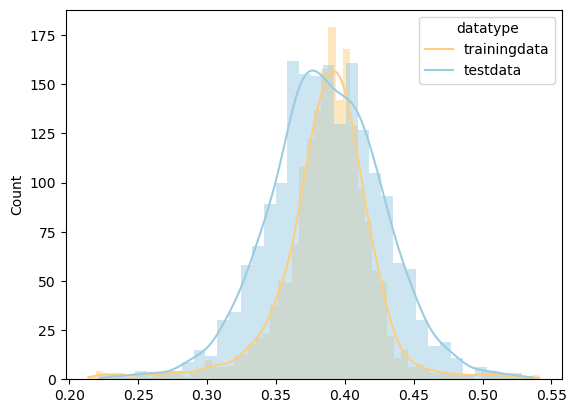

Using standard scaler...


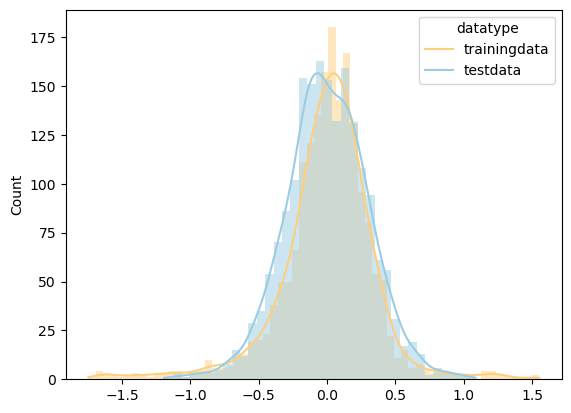

training data shape is  (3000, 1890) 
test data shape is  (100, 1890)
AnnData object with n_obs × n_vars = 3000 × 1890
    obs: 'Group1', 'Group2', 'Group3', 'Group4', 'Group5'
    uns: 'cell_types' AnnData object with n_obs × n_vars = 100 × 1890
    obs: 'Group1', 'Group2', 'Group3', 'Group4', 'Group5'
    uns: 'cell_types' 1
no initial weight
============= Epoch 01/30 in training =============
pred_loss=0.027187
============= Epoch 02/30 in training =============
pred_loss=0.026775
============= Epoch 03/30 in training =============
pred_loss=0.026235
============= Epoch 04/30 in training =============
pred_loss=0.025549
============= Epoch 05/30 in training =============
pred_loss=0.024323
============= Epoch 06/30 in training =============
pred_loss=0.022143
============= Epoch 07/30 in training =============
pred_loss=0.019072
============= Epoch 08/30 in training =============
pred_loss=0.015350
============= Epoch 09/30 in training =============
pred_loss=0.011864
============= 

In [7]:
## predict
from OmicsTweezer import train_predict
predict = train_predict.train_predict(sc_reference, target_bulk,num=3000, scale=True, ot_weight=1)

In [11]:
predict.head(5)

,Group1,Group2,Group3,Group4,Group5
0,0.298285,0.413822,0.104297,0.076381,0.107216
1,0.130346,0.344667,0.252189,0.127101,0.145697
2,0.086282,0.123843,0.232533,0.383752,0.173591
3,0.251280,0.112248,0.116560,0.271230,0.248682
4,0.097646,0.137434,0.532700,0.139232,0.092987
